Column Names: ['773_1P', '773_2P', '773_4P']
Dataframe loaded successfully.
Top X feature numbers calculated successfully.
Sets for Venn diagram created successfully.
Percentage of points overlapping in the center: 0.00517004270455274 %


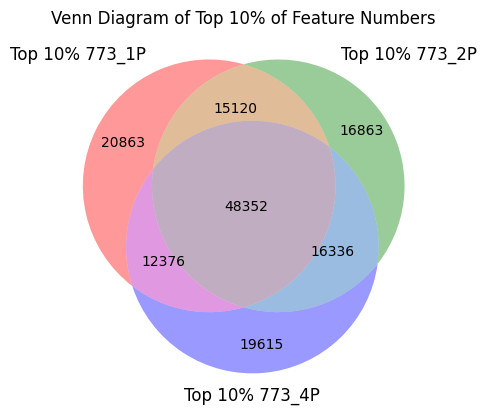

In [34]:
import traceback
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

def plot_top_X_venn(csv_file, column_names, X):
    try:
        # Read only necessary columns from the CSV file
        df = pd.read_csv(csv_file, usecols=['FeatureNum'] + column_names)
        print("Dataframe loaded successfully.")

        # Initialize a set to store top X% feature numbers
        top_X_feature_nums = set()
        
        # Find Feature Numbers in the top X% for each column
        for col in column_names:
            # Sort the column
            sorted_column = df.sort_values(by=col, ascending=False)
            # Calculate the threshold value for X% of the data
            threshold = sorted_column[col].quantile(1 - X/100)
            # Select the rows where the column value is greater than the threshold
            top_X_rows = sorted_column[sorted_column[col] > threshold]
            # Add the FeatureNums to the set
            top_X_feature_nums.update(top_X_rows['FeatureNum'])
        print("Top X feature numbers calculated successfully.")
        
        # Create sets for Venn diagram
        sets = []
        for col in column_names:
            sets.append(set(df[df[col] > df[col].quantile(1 - X/100)]['FeatureNum']))
        print("Sets for Venn diagram created successfully.")
        
        # Plot Venn diagram
        plt.figure()
        venn_diagram = venn3(sets, set_labels=('Top {}% {}'.format(X, column_names[0]), 'Top {}% {}'.format(X, column_names[1]), 'Top {}% {}'.format(X, column_names[2])))
        plt.title('Venn Diagram of Top {}% of Feature Numbers'.format(X))

        plt.show()
    except Exception as e:
        print("An error occurred:", e)
        print(traceback.format_exc())

# Implementation:
csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein Comparison/Master sheet_3_exp.csv"
column_names = ['773_1P', '773_2P', '773_4P',]  # Input column names
X = 10  # Input desired X value

print("Column Names:", column_names)
plot_top_X_venn(csv_file_path, column_names, X)
